In [1]:
from helper.dataset_reader import read_tsv
from lang_id_crf import *
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

## Scenario 1
1. Using different data for training and test data.
2. Include named entity as one of the tags

In [2]:
langid = LanguageIdentifier()

In [3]:
train_data = read_tsv('../raw dataset/all-tagged-280322-train.tsv')
test_data = read_tsv('../raw dataset/all-tagged-080422-test.tsv')


 Evaluation on the test data
              precision    recall  f1-score   support

          ID       0.84      0.97      0.90     11123
          JV       0.89      0.82      0.85      4906
          EN       0.91      0.73      0.81      1747
          NE       0.86      0.32      0.47       674
           O       0.98      0.95      0.97      4817
   MIX-ID-EN       0.85      0.60      0.71       578
   MIX-ID-JV       0.96      0.38      0.54       204
   MIX-JV-EN       0.98      0.36      0.53       258

    accuracy                           0.88     24307
   macro avg       0.91      0.64      0.72     24307
weighted avg       0.89      0.88      0.88     24307

Confusion Matrix


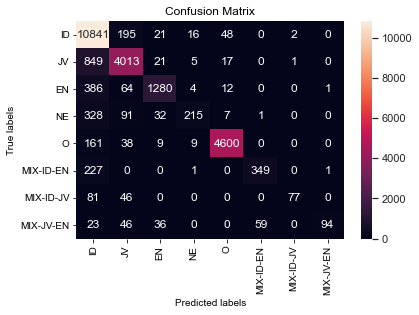


 Evaluation on the training data
              precision    recall  f1-score   support

          ID       0.96      0.99      0.97     38006
          JV       0.93      0.93      0.93      8918
          EN       0.98      0.92      0.95      4877
          NE       0.97      0.84      0.90      2611
           O       1.00      0.98      0.99     14499
   MIX-ID-EN       0.99      0.97      0.98      2107
   MIX-ID-JV       0.99      0.94      0.97       626
   MIX-JV-EN       0.97      0.93      0.95       525

    accuracy                           0.97     72169
   macro avg       0.97      0.94      0.95     72169
weighted avg       0.97      0.97      0.97     72169

Confusion Matrix


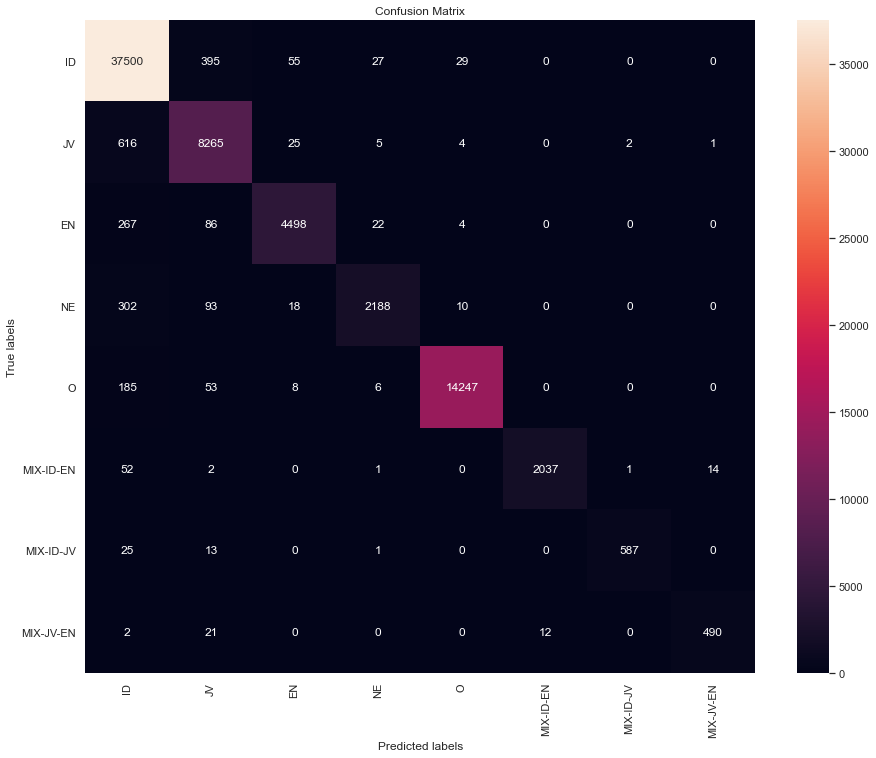

In [4]:
langid.pipeline_(train_data=train_data, test_data=test_data, n_label=8, model_name='mod_080422.pkl')

## Scenario 2:
1. Using different data for training and test data.
2. Exclude named entity as one of the tags. Named entities as

In [5]:
train_data_ = read_tsv('../raw dataset/all-tagged-280322-train-no-ne.tsv')
test_data_ = read_tsv('../raw dataset/all-tagged-080422-test-no-ne.tsv')


 Evaluation on the test data
              precision    recall  f1-score   support

          ID       0.84      0.97      0.90     11123
          JV       0.89      0.82      0.86      4906
          EN       0.92      0.72      0.81      1747
           O       0.97      0.88      0.92      5491
   MIX-ID-EN       0.87      0.60      0.71       578
   MIX-ID-JV       0.96      0.37      0.53       204
   MIX-JV-EN       0.98      0.37      0.54       258

    accuracy                           0.88     24307
   macro avg       0.92      0.68      0.75     24307
weighted avg       0.89      0.88      0.88     24307

Confusion Matrix


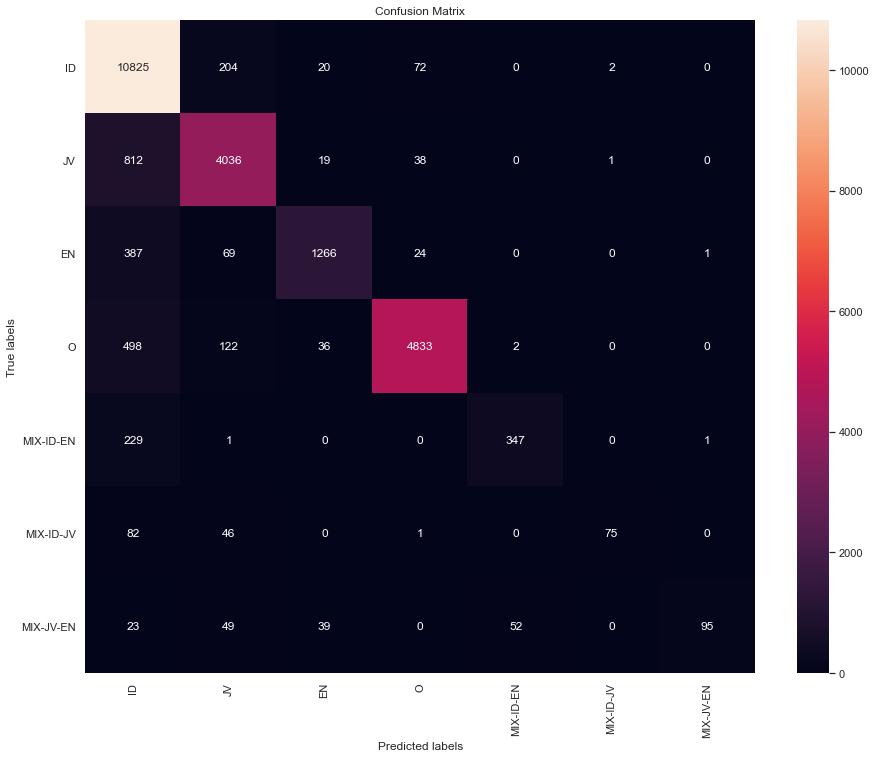


 Evaluation on the training data
              precision    recall  f1-score   support

          ID       0.97      0.99      0.98     38006
          JV       0.93      0.93      0.93      8918
          EN       0.98      0.92      0.95      4877
           O       0.99      0.97      0.98     17110
   MIX-ID-EN       0.99      0.96      0.98      2107
   MIX-ID-JV       0.99      0.93      0.96       626
   MIX-JV-EN       0.97      0.93      0.95       525

    accuracy                           0.97     72169
   macro avg       0.97      0.95      0.96     72169
weighted avg       0.97      0.97      0.97     72169

Confusion Matrix


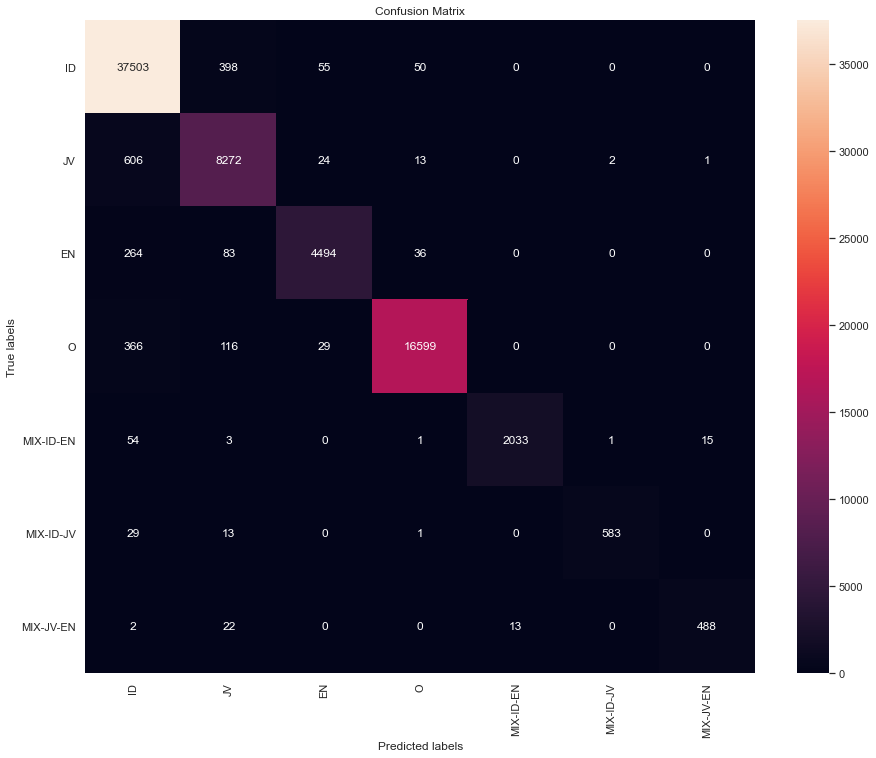

In [6]:
langid.pipeline_(train_data=train_data_, test_data=test_data_, n_label=7, model_name='mod_080422_no_ne.pkl')